<h1>Clustering Introduction With Random Data</h1>

## About clustering

### Supervised vs unsupervised methods

In **supervised methods**, we start with some sort of "ground truth." And we use that ground truth both to train and test our machine learning models.

In **unsupervised methods**, we don't start with any ground truth. We have the data and look for patterns.

Clearly unsupervised methods are more cool.

### Create some random data: Points on a plane

In [ ]:
import random
import numpy

In [ ]:
import matplotlib.pyplot as plt
def scatter_plot(dvectors, dnames = []):
    plt.axhline(xmin = -1, xmax = 1)
    plt.axvline(ymin = -1, ymax = 1)
    plt.grid(True)
    plt.axis('on')
    xvals = []
    yvals = []
    if dnames == []:
        dnames = range(len(dvectors))
    for d in dvectors:
        xvals.append(d[0])
        yvals.append(d[1])
    plt.scatter(xvals, yvals)
    for i in range(len(dnames)):
        loc = [dvectors[i][0] + .02, dvectors[i][1] + .02]
        plt.annotate(dnames[i], loc, size = "large")

In [ ]:
from sklearn.datasets import make_blobs
Xtest, y = make_blobs(n_samples=10, centers=3, n_features=2, shuffle=True, random_state=42)
scatter_plot(Xtest)

In [ ]:
Xtest.shape

In [ ]:
Xtest[0]

### Hierarachical clustering

![image.png](https://www.statisticshowto.com/wp-content/uploads/2016/11/clustergram.png)
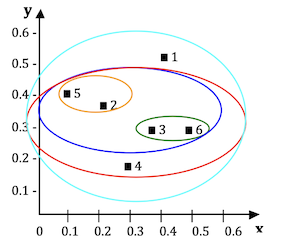

## Do the clustering

**We'll use sklearn rather than nltk**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity="euclidean")
clusterer.fit(Xtest)

In [ ]:
clusterer.labels_

In [ ]:
from sklearn.neighbors import NearestCentroid
def get_centroids(X, labels):
    clf = NearestCentroid()
    clf.fit(X, labels)
    centroids = clf.centroids_
    return centroids

In [ ]:
centroids = get_centroids(Xtest, clusterer.labels_)
scatter_plot(centroids)

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
plot_dendrogram(clusterer)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(Xtest, clusterer.labels_)

## Kmeans clustering

A kind of flat clustering

How it works:

1. It randomly picks a number of points equal to the number of clusters. These are the first guesses at centers for the clusters.
2. Each sample in the data set is assigned to the cluster corresponding to the center to which it is closest.
3. Find the average of the points in each cluster. These become the new centers.
4. The process iterates it converges within some measure of tolerance.

In [ ]:
from sklearn.cluster import KMeans
kclusterer = KMeans(n_clusters=3).fit(Xtest)

In [ ]:
kclusterer.labels_

In [ ]:
centroids = kclusterer.cluster_centers_

In [ ]:
scatter_plot(centroids)

## Determining the right number of clusters

In [89]:
def compute_rss(X, centroids, labels):
    rss = 0
    for dnum in range(X.shape[0]):
        vec = X[dnum]
        centroid = centroids[labels[dnum]]
        res_vec = vec - centroid
        rss += np.dot(res_vec, res_vec)
    return rss

def compute_rss_data(X, start, end):
    results = []
    for k in range(start, end):
        kcluster = KMeans(n_clusters=k)
        kcluster.fit(X)
        centroids = kcluster.cluster_centers_
        labels = kcluster.labels_
        rss = compute_rss(X, centroids, labels)
        results.append([k, rss])
    return results

def compute_rss_data_agglomerative(X, start, end):
    results = []
    for k in range(start, end):
        clusterer = AgglomerativeClustering(n_clusters=k, linkage="ward", affinity="euclidean")
        clusterer.fit(X)
        labels = clusterer.labels_
        centroids = get_centroids(X, labels)
        rss = compute_rss(X, centroids, labels)
        results.append([k, rss])
    return results

In [ ]:
rss_list = compute_rss_data(Xtest, 2, 10)

In [ ]:
plt.clf()
x = [res[0] for res in rss_list]
y = [res[1] for res in rss_list]
plt.plot(x, y)

### Elbow visualizer
explained [here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 10), metric='distortion')
visualizer.fit(Xtest)
visualizer.poof()

### Silhouette score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 10), metric="silhouette")
visualizer.fit(Xtest)
visualizer.poof()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.cluster import KMeans
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3))
visualizer.fit(Xtest)

In [ ]:
from sklearn.metrics import silhouette_samples
silhouette_samples(Xtest, visualizer.labels_)

In [ ]:
visualizer.labels_

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.cluster import KMeans
visualizer = SilhouetteVisualizer(KMeans(n_clusters=5))
visualizer.fit(Xtest)

In [ ]:
visualizer.labels_

In [ ]:
list(visualizer.labels_).count(3)